<a href="https://colab.research.google.com/github/sdgroeve/Machine-Learning-Course-2days/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import warnings
warnings.filterwarnings('ignore')

# MNIST digit classification: Classical ML

## 1. The dataset

The MNIST dataset<sup>1</sup> (Modified National Institute of Standards and Technology dataset) is a large dataset containing pre-processed **28x28 pixel** images of handwritten digits. The dataset is widely used for teaching machine learning concepts.

<sub>[1] THE MNIST DATABASE of handwritten digits, Yann LeCun, Courant Institute, NYU Corinna Cortes, Google Labs, New York Christopher J.C. Burges, Microsoft Research, Redmond.</sub>

Let's load this dataset straight from the [openml.org](https://www.openml.org/) public repository with the following Scikit-learn function:

In [40]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False, cache=Tru)

The `fetch_openml()` function returns a Python [dictionary-like object](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html).

The actual data can be obtained with the following keys:

- data: np.array, scipy.sparse.csr_matrix of floats, or pandas DataFrame
- target: np.array, pandas Series or DataFrame

This dataset contains 70000 labeled images of digits:

In [41]:
print("#datapoints: {}".format(len(mnist.data)))

#datapoints: 70000


Let's explore the feature vectors:

In [42]:
print("Length of feature vector: {}\n".format(len(mnist.data[0])))
print("Example of feature vector:\n")
print(mnist.data[0])

Length of feature vector: 784

Example of feature vector:

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 25

Each image in the dataset is represented by a 784 dimensional vector with one gray-scale value (0 means black, 255 means white) for each of the 28x28 pixels.

We can reshape this feature vector to the gray-scaled image as follows:

In [43]:
mnist.data[0].reshape((28,28))

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

We will denote the feature vectors as `X` and the corresponding labels as `y`:

In [44]:
X = mnist.data
y = mnist.target

print(X.dtype)
print(y.dtype)

float64
object


Notice that the labels are Python objects (strings):

In [45]:
print(y)

['5' '0' '4' ... '4' '5' '6']


We convert these to numbers (integers):

In [46]:
y = y.astype('int64')

We can use the Python [matplotlib](https://matplotlib.org/) library to plot the digit images in `X` (the label for each image is shown in the title):

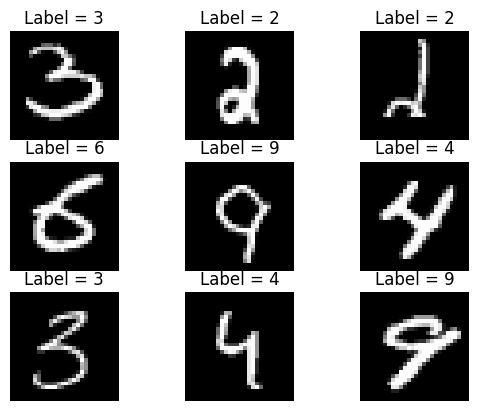

In [47]:
import matplotlib.pyplot as plt
from random import randint

# Display 9 randomly selected images
for c in range(1, 10):
    plt.subplot(3, 3,c)
    i = randint(0,X.shape[0])
    im = X[i].reshape((28,28))
    plt.axis("off")
    plt.title("Label = {}".format(y[i]))
    plt.imshow(im, cmap='gray')

It is 'best practice' in Machine Learning to normalize the feature values such that all features have values with the same 'not to large' scale.

Scikit-learn has functions to normalize features in `sklearn.preprocessing`. The most common ones are [`MinMaxScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) and [`StandardScaler()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

We will use the `MinMaxScaler()`:

In [48]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(X)

print(X[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

To be able to **properly** evaluate our trained model we need to first create an **independent test set** with images that are **not used** during model building:

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, shuffle=True, random_state=42)

## 2. The model

Now we are ready to define our model.

We will fit a [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) model with a maximum tree depth equal to 5 and with at least 10 datapoints in each leaf:

In [68]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

Each Scikit-learn model has a function `fit()` that optimizes the modelparameters to minimize the cost function:

In [69]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

Each Scikit-learn model also has a function `predict()` that applies the fitted model to compute class lables for feature vectors:

In [70]:
# Perform the predictions
y_predicted = clf.predict(X_test)

print(y_predicted)

[8 4 6 ... 6 7 7]


## 3. Evaluation

Scikit-learn offers many [metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) for evaluating the prediction performance. The most common metric is `accuracy`:

In [71]:
from sklearn.metrics import accuracy_score

print("Accuracy = {}%".format(accuracy_score(y_test, y_predicted)*100))

Accuracy = 66.38857142857142%


To get more insight into the prediction errors for each class we can compute a confusion matrix:

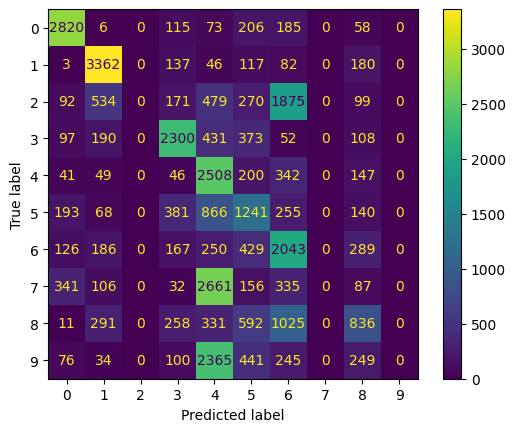

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
plt.show()

Now, let's take a look a the misclassified images in the test set:

In [57]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_predicted):
    if label != predict:
        misclassified_images.append(index)
    index +=1

print("Number of misclassified test set images: {}".format(len(misclassified_images)))

Number of misclassified test set images: 19890


Let's plot some of these:

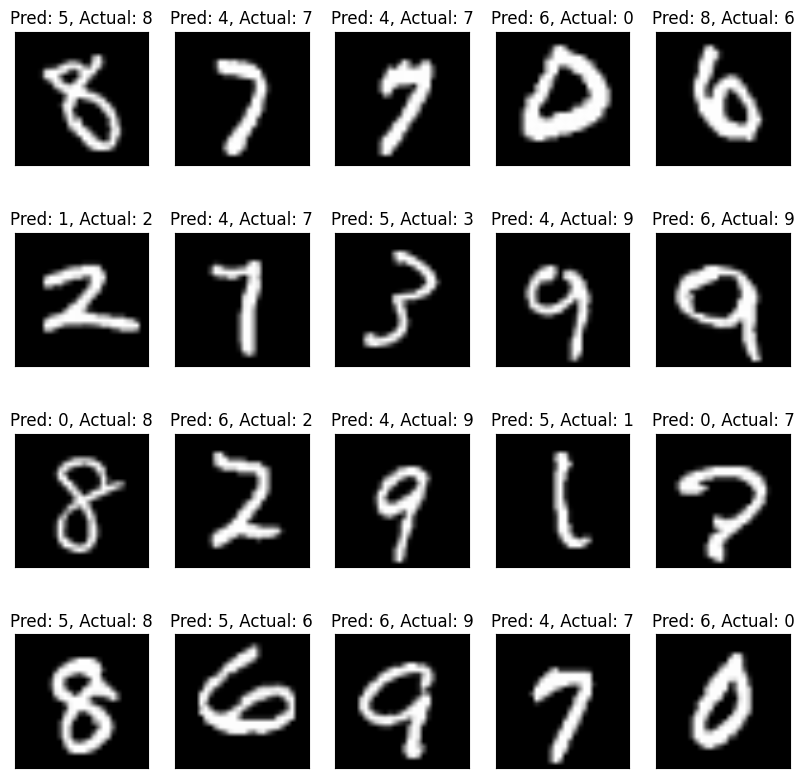

In [58]:
plt.figure(figsize=(10,10))
for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot

    p.imshow(X_test[bad_index].reshape(28,28), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks

    p.set_title(f'Pred: {y_predicted[bad_index]}, Actual: {y_test[bad_index]}');

## 4. Hyperparameter optimization

Scikit-learn offers [many functions](https://scikit-learn.org/stable/modules/grid_search.html) for hyperparameter optimization. We will use `GridSearchCV()` that evaluates different hyperparamter value combinations using cross-validation.

In `GridSearchCV()` you define the hyperparameter values to consider in a Python dictionary:  

In [72]:
from sklearn.model_selection import GridSearchCV

tune_grid = {
            "max_depth": [3,7,10],
            "min_samples_split": [100,1000]
        }

print(tune_grid)

{'max_depth': [3, 7, 10], 'min_samples_split': [100, 1000]}


Next, we can initialize `GridSearchCV()` just like any other model in Scikit-learn:

In [73]:
clf_cv = GridSearchCV(clf, tune_grid, cv=5, verbose=3)

`GridSearchCV()` also has a  `fit()` function that fit all the models and evaluate their prediction performance with the cross-validation procedure:

In [74]:
clf_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END max_depth=3, min_samples_split=100;, score=0.457 total time=   1.8s
[CV 2/5] END max_depth=3, min_samples_split=100;, score=0.444 total time=   1.8s
[CV 3/5] END max_depth=3, min_samples_split=100;, score=0.438 total time=   2.3s
[CV 4/5] END max_depth=3, min_samples_split=100;, score=0.450 total time=   1.8s
[CV 5/5] END max_depth=3, min_samples_split=100;, score=0.447 total time=   1.8s
[CV 1/5] END max_depth=3, min_samples_split=1000;, score=0.457 total time=   1.7s
[CV 2/5] END max_depth=3, min_samples_split=1000;, score=0.444 total time=   1.7s
[CV 3/5] END max_depth=3, min_samples_split=1000;, score=0.438 total time=   1.7s
[CV 4/5] END max_depth=3, min_samples_split=1000;, score=0.450 total time=   2.0s
[CV 5/5] END max_depth=3, min_samples_split=1000;, score=0.447 total time=   2.2s
[CV 1/5] END max_depth=7, min_samples_split=100;, score=0.770 total time=   3.6s
[CV 2/5] END max_depth=7, min_samples_split=

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=10),
             param_grid={'max_depth': [3, 7, 10],
                         'min_samples_split': [100, 1000]},
             verbose=3)

The fitted `GridSearchCV()` has attribute `best_estimator_` that contains the model with the highest cross-validation accuracy **retrained on all the data**.

It also has attribute `best_score_` that contains the cross-validation score (accuracy in this case) of the best estimator:

In [75]:
print(clf_cv.best_estimator_)
print(clf_cv.best_score_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=10, min_samples_split=100)
0.8097428571428571


A fitted `GridSearchCV()` also has the function `predict()` that applies `best_estimator_` to predict the classes:

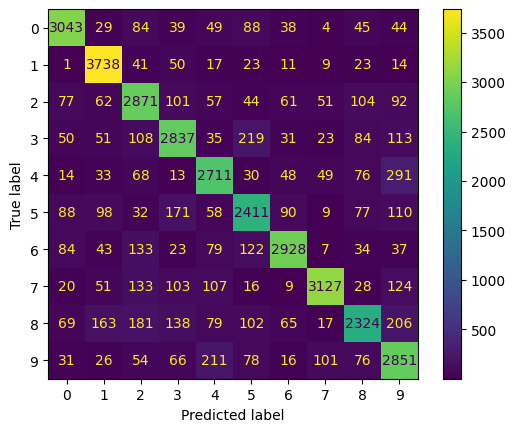

In [76]:
y_predicted = clf_cv.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted)
plt.show()

The `predict()` function returns the classes only. The logisitic regression algorithm 'predicts' probabilities for each class. The `predict_proba()` functions returns these probabilities:

In [77]:
y_predicted = clf.predict_proba(X_test)

These are the class probability predictions for the first instance in the test set `y_test`:

In [78]:
print(y_predicted[0])

[0.01582278 0.03691983 0.01054852 0.02109705 0.03481013 0.02004219
 0.01160338 0.01582278 0.82383966 0.00949367]
